# Example FFN and breast cancer data set

Using the breast cancer dataset from sklearn as an example, we will familiarise ourselves with the application of a feed-forward neural network.
First, we will load the dataset and visualise the dimensions, look at the individual features and understand the problem.

It follows that there is a binary classification problem: Breast cancer or not breast cancer given 30 input features.

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

## Workflow 

At first, we preprocess the data set so that we have the best possible starting situation for our model.
This means we **scale** and **split** into training and test set. There is no missing data.

Scaling is particularly important here, as we need to cover different areas of the input features, as seen above.

In [8]:
from sklearn.preprocessing import StandardScaler

X, y = cancer.data, cancer.target

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 0)

In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter = 1000, 
                    alpha = 1.0,
                    activation = "logistic",
                    solver = "adam",
                    batch_size = 50,
                    learning_rate_init = 0.001,
                    learning_rate = "constant",
                    hidden_layer_sizes = (10,),
                    verbose = False,
                    random_state = 0)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.958


As you can see in the example, there are several options for the MLPClassifier. Unfortunately, it is not possible to assign different activation functions to the individual hidden layers in the sklearn functionality.
Nevertheless, there are some parameters that can be selected and can significantly influence the result.

# Task

Go to the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and use the description there and the lecture materials to try to understand what the individual parameters mean and what choices you have.
Play with the parameters and observe the change in accuracy.

In [11]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter = 1000, 
                    alpha = 1.0,
                    activation = "logistic",
                    solver = "sgd",
                    batch_size = 20,
                    learning_rate_init = 0.001,
                    learning_rate = "constant",
                    hidden_layer_sizes = (10,),
                    verbose = False,
                    random_state = 0)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.951
Accuracy on test set: 0.951


## Workflow und Parameter tuning

### k-fold cross validation

k-fold cross validation is also included in the sklearn package and has a simple interface with cross_val_score. The number of folds can be defined via the parameter cv

In [12]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(mlp, X_scaled, y, cv=4)
print("Corss-validation scores: {}".format(scores))

Corss-validation scores: [0.93  0.944 0.958 0.965]


By default, the cross_val_score function uses the stratified k-fold strategy as the model for classifiers and a normal k-fold strategy for regression problems.

Usually, the individual accuracy values are then averaged to obtain a solid statement.

In [13]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.95


## Grid Search

We want to use the GridSearchCV class from sklearn to determine the parameters. First, we specify the parameter grid that we want to analyse.

In [14]:
param_grid = {'alpha': [0.01, 0.1, 1, 10],
              'activation': ["logistic", "relu", "tanh"]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10], 'activation': ['logistic', 'relu', 'tanh']}


In [15]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter = 1000, 
                    solver = "adam",
                    batch_size = 200,
                    learning_rate_init = 0.001,
                    learning_rate = "constant",
                    hidden_layer_sizes = (10,),
                    verbose = False,
                    random_state = 0)

grid_search = GridSearchCV(mlp, param_grid, cv=3)

In [16]:
grid_search.fit(X_scaled, y)

GridSearchCV(cv=3,
             estimator=MLPClassifier(batch_size=200, hidden_layer_sizes=(10,),
                                     max_iter=1000, random_state=0),
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'alpha': [0.01, 0.1, 1, 10]})

In [17]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Test set score: 0.99
Best parameters: {'activation': 'logistic', 'alpha': 0.01}
Best cross-validation score: 0.98


It is important to note that best_score_ indicates the accuracy of the cross-validation on the training dataset and score reflects the accuracy on the test dataset!

In [18]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
MLPClassifier(activation='logistic', alpha=0.01, batch_size=200,
              hidden_layer_sizes=(10,), max_iter=1000, random_state=0)


## Analyse the grid search cv results

In [19]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.225367,0.217582,0.193384,0.136851,0.120277,0.133831,0.12429,0.156078,0.112893,0.095448,0.114665,0.126237
std_fit_time,0.013088,0.00321,0.007498,0.008956,0.007255,0.012408,0.001039,0.00415,0.005384,0.00183,0.010099,0.011954
mean_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_activation,logistic,logistic,logistic,logistic,relu,relu,relu,relu,tanh,tanh,tanh,tanh
param_alpha,0.01,0.1,1.0,10.0,0.01,0.1,1.0,10.0,0.01,0.1,1.0,10.0
params,"{'activation': 'logistic', 'alpha': 0.01}","{'activation': 'logistic', 'alpha': 0.1}","{'activation': 'logistic', 'alpha': 1}","{'activation': 'logistic', 'alpha': 10}","{'activation': 'relu', 'alpha': 0.01}","{'activation': 'relu', 'alpha': 0.1}","{'activation': 'relu', 'alpha': 1}","{'activation': 'relu', 'alpha': 10}","{'activation': 'tanh', 'alpha': 0.01}","{'activation': 'tanh', 'alpha': 0.1}","{'activation': 'tanh', 'alpha': 1}","{'activation': 'tanh', 'alpha': 10}"
split0_test_score,0.984211,0.984211,0.978947,0.931579,0.968421,0.963158,0.973684,0.978947,0.978947,0.984211,0.984211,0.978947
split1_test_score,0.973684,0.973684,0.968421,0.936842,0.968421,0.968421,0.968421,0.973684,0.957895,0.957895,0.963158,0.957895
split2_test_score,0.978836,0.978836,0.978836,0.968254,0.978836,0.978836,0.978836,0.978836,0.978836,0.978836,0.973545,0.978836


In [50]:
scores = np.array(results.mean_test_score).reshape(3,4)
print(results.mean_test_score)
print(results.mean_test_score.shape)

0     0.978910
1     0.978910
2     0.975401
3     0.945558
4     0.971893
5     0.970138
6     0.973647
7     0.977156
8     0.971893
9     0.973647
10    0.973638
11    0.971893
Name: mean_test_score, dtype: float64
(12,)


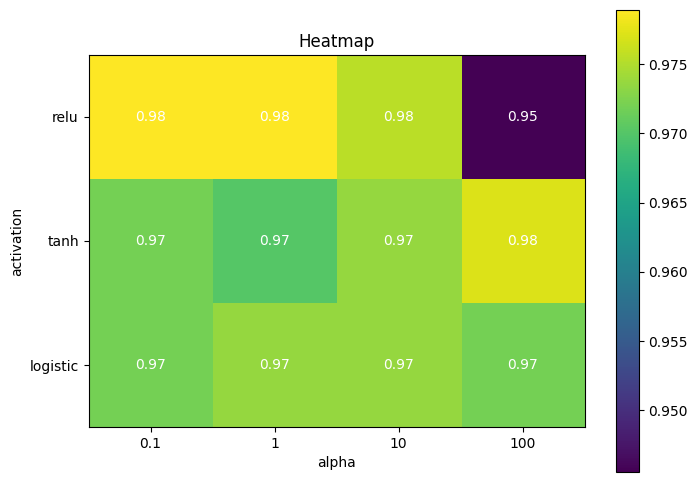

In [51]:
import matplotlib.pyplot as plt

# Heatmap erstellen
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap='viridis')
plt.colorbar()

# Achsenticks setzen
plt.xticks(np.arange(len(param_grid["alpha"])), param_grid["alpha"])
plt.yticks(np.arange(len(param_grid["activation"])), param_grid["activation"])
plt.xlabel("alpha")
plt.ylabel("activation")
plt.title("Heatmap")
# Numerische Werte in die Zellen schreiben
for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        plt.text(j, i, f"{scores[i, j]:.2f}", ha="center", va="center", color="white")

plt.show()